In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import matplotlib.animation as animation
from matplotlib import rcParams

## Korteweg-De-Vries Equations

The KdV equations models spatially in 1D non-linear, non-dissipative dispersive waves. Generally the velocity $u(x, t)$ follows the PDE 

$\partial_t u (x, t) + \partial^3_x u(x, t) = u(x, t) \partial_x u(x, t), \; \; \; \; \; \; x \in \mathbb{R}, \; \; \; t \geq 0$,

with the RHS being the non-linear, advection term and $\partial^3_x u(x, t)$ accounting for dispersion.
The Linearized KdV equation gets rid of the non-linear term in the original KdV equation 

$\partial_t u (x, t) + \partial^3_x u(x, t) = 0, \; \; \; \; \; \; x \in \mathbb{R}, \; \; \; t \geq 0$,

with initial condition $u(x, 0) = f(x)$.

By applying the Fourier transform on our Partial Differential Equation (PDE), we can write 

$\text{FT} \left [ \partial_t u (x, t) + \partial^3_x u(x, t) = 0 \right ]$.

It is easy to show that the equation above can be written

$\text{FT} \left [ \partial_t u (x, t) \right ] + \text{FT} \left [ \partial^3_x u(x, t) \right ] = 0$.

We are left with the spectral KdV equations (denoting the spectral velocity $\hat{u}(q, t) $),

$\partial_t \hat{u}(q, t) - i q^3 \hat{u}(q, t) = 0$,

such that,

$\hat{u}(q, t) = \hat{f}(q) e^{iq^3t}$

In [3]:
# Spatial parameters
L = 100.0
Nx = 256
dx = L/Nx
x = np.linspace(0, L, Nx, endpoint=False)

# Time parameters
T = 10.0
dt = 0.001
Nt = int(T/dt)

# Initial condition
u0 = np.cos(2*np.pi * x/L)

In [4]:
def third_d(u, dx):
    return (np.roll(u, -2) - 2*np.roll(u, -1) + 2*np.roll(u, 1) - np.roll(u, 2)) / (2*dx**3)

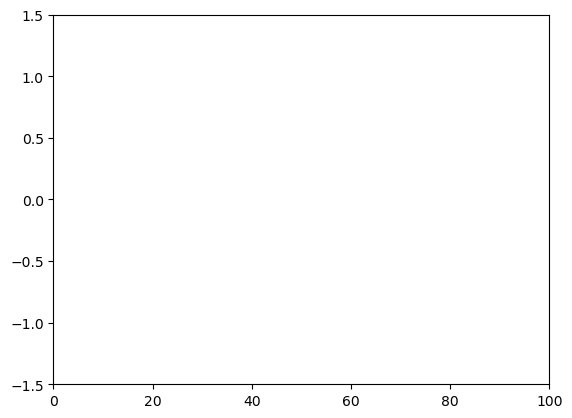

In [8]:
for n in range(Nt):
    u0 = u0 - dt * third_d(u0, dx)
    
# Animation setup
fig, ax = plt.subplots()
ax.set_xlim(0, L)
ax.set_ylim(-1.5, 1.5)
line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    u = np.cos(2*np.pi * (x/L - i*dt/T))
    line.set_data(x, u)
    return line,

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=Nt, interval=dt*1000, blit=True)
plt.show()
rcParams['animation.ffmpeg_path'] = '/usr/bin/ffmpeg'